In [1]:
import requests
from bs4 import BeautifulSoup

def get_product_urls(category_url, headers):
    try:
        response = requests.get(category_url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        product_elements = soup.find_all('a', class_='a-link-normal s-no-outline')
        product_urls = ['https://www.amazon.com' + elem['href'] for elem in product_elements]
        return product_urls
    except requests.exceptions.RequestException as e:
        print(f"Error fetching category page: {e}")
        return []

def get_product_info(url, headers):
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the product title
        product_title_element = soup.find('span', id='productTitle')
        
        # Find the product rating
        product_rating_element = soup.find('span', class_='a-icon-alt')
        
        # Find the number of reviews
        product_reviews_element = soup.find('span', id='acrCustomerReviewText')
        
        product_title = product_title_element.text.strip() if product_title_element else 'Not Available'
        product_rating = product_rating_element.text.split(' ')[0] if product_rating_element else 'Not Available'
        product_reviews = product_reviews_element.text.strip() if product_reviews_element else 'Not Available'

        product_info = {
            'Product Title': product_title,
            'Product Rating': product_rating,
            'Number of Reviews': product_reviews
        }
        return product_info
    except requests.exceptions.RequestException as e:
        print(f"Error fetching page: {e}")
        return None

def scrape_product_info():
    category_url = 'https://www.amazon.com/s?i=beauty-intl-ship&bbn=16225006011&rh=n%3A11060451%2Cn%3A3760911&dc&qid=1597929223&rnid=11060451&ref=sr_nr_n_5'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Connection': 'keep-alive',
    }
    
    product_urls = get_product_urls(category_url, headers)
    if not product_urls:
        print("Failed to fetch product URLs.")
        return

    all_product_data = []

    for product_url in product_urls:
        print(f"Scraping product URL: {product_url}")
        product_data = get_product_info(product_url, headers)
        if product_data:
            all_product_data.append(product_data)
    
    if all_product_data:
        print("Scraping complete. Here is the product information:")
        for product in all_product_data:
            print(product)
    else:
        print("No data scraped.")

if __name__ == '__main__':
    scrape_product_info()


Scraping product URL: https://www.amazon.com/sspa/click?ie=UTF8&spc=MToxOTU3MDA4NTIyNjczODcyOjE3MTk5Mzg2NTk6c3BfYXRmX2Jyb3dzZTozMDAyNTA0NzIxMDA4MDI6OjA6Og&url=%2FFacial-Steamer-Personal-Professional-Cleaning%2Fdp%2FB0CT8SJVXW%2Fref%3Dsr_1_1_sspa%3Fqid%3D1719938659%26rnid%3D11060451%26s%3Dbeauty-intl-ship%26sr%3D1-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1
Scraping product URL: https://www.amazon.com/sspa/click?ie=UTF8&spc=MToxOTU3MDA4NTIyNjczODcyOjE3MTk5Mzg2NTk6c3BfYXRmX2Jyb3dzZTozMDAxNjEyNTQ5MTYzMDI6OjA6Og&url=%2FJEMZ-Teeth-Whitening-Treatment-Kit%2Fdp%2FB08SR7WNDW%2Fref%3Dsr_1_2_sspa%3Fqid%3D1719938659%26rnid%3D11060451%26s%3Dbeauty-intl-ship%26sr%3D1-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1
Scraping product URL: https://www.amazon.com/sspa/click?ie=UTF8&spc=MToxOTU3MDA4NTIyNjczODcyOjE3MTk5Mzg2NTk6c3BfYXRmX2Jyb3dzZTozMDAyMzI0NTE2MjgzMDI6OjA6Og&url=%2FELEMIS-Pro-Collagen-Marine-Cream-SPF%2Fdp%2FB07BMBQG73%2Fref%3Dsr_1_3_sspa%3Fqid%3D1719938659%2

                                            Product Title Product Rating  \
count                                                   9              9   
unique                                                  9              7   
top     Nano Facial Steamer,Ionic Face Steamer for Per...            4.7   
freq                                                    1              2   

       Number of Reviews  
count                  9  
unique                 9  
top           17 ratings  
freq                   1  


C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


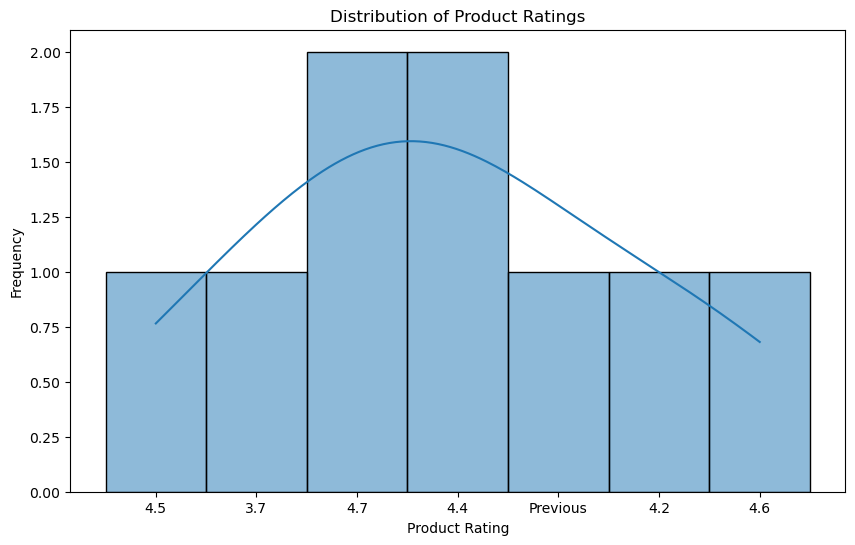

C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


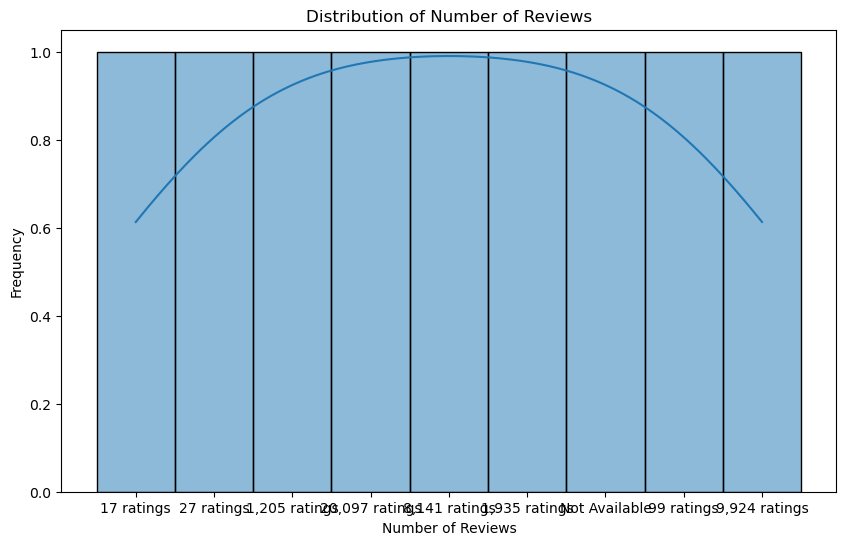

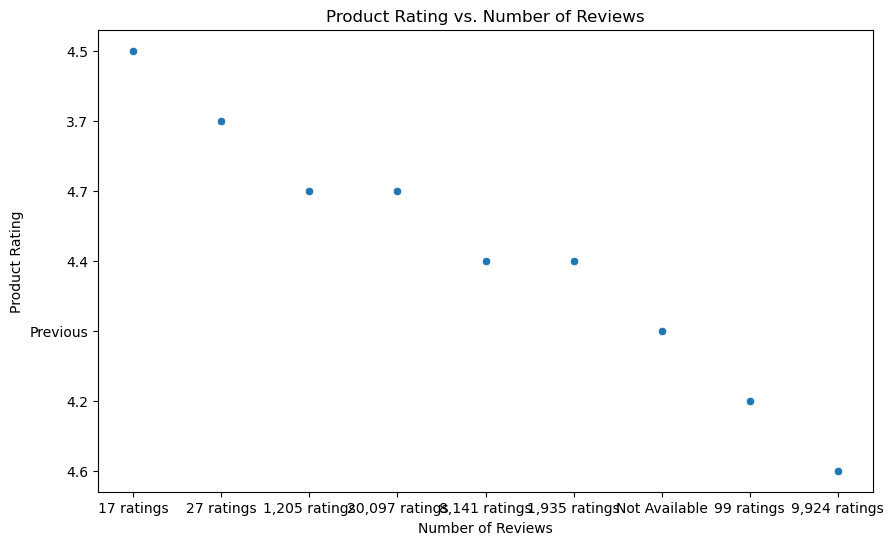

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have scraped data and stored it in a DataFrame
df = pd.DataFrame([
    {'Product Title': 'Nano Facial Steamer,Ionic Face Steamer for Personal Skin Care at Home or Salon, Spa, Professional Nano Ionic Facial Steamer for Deep Cleaning', 'Product Rating': '4.5', 'Number of Reviews': '17 ratings'},
    {'Product Title': 'Jemz Smile Chewable Teeth Whitening Kit - 16 Treatments, Teeth Whitening Gum for Sensitive Teeth Enamel, Tooth Whitening Without Sensitivity', 'Product Rating': '3.7', 'Number of Reviews': '27 ratings'},
    {'Product Title': 'ELEMIS Pro-Collagen Marine Cream SPF 30, Lightweight Anti-Wrinkle Daily Face Moisturizer Firms, Smoothes, Hydrates, & Delivers Sun Protection', 'Product Rating': '4.7', 'Number of Reviews': '1,205 ratings'},
    {'Product Title': 'Gillette Mens Razor Blade Refills, 10 Fusion5 Cartridges, 2 ProGlide Cartridges, Lubrastrip for a More Comfortable Shave 12 Count(Pack of 1)', 'Product Rating': '4.7', 'Number of Reviews': '20,097 ratings'},
    {'Product Title': 'MANSPOT Manscape Groin & Body Hair Trimmer for Men, Electric Ball Trimmer Pubic Trimmer Body Shaver, Replaceable Ceramic Blade Heads,Waterproof Wet/Dry Body Shaver Groomer,90 Minutes Shaving', 'Product Rating': '4.4', 'Number of Reviews': '8,141 ratings'},
    {'Product Title': 'Small Scissors, Eyebrow Scissors, Nose Hair Scissors Round Tip Design, Will Not Hurt the Nasal Cavity. Professional Grooming Scissors for Hair, Eyelashes, Nose, Eyebrow Trimming, Mustache. - AsonTao', 'Product Rating': '4.4', 'Number of Reviews': '1,935 ratings'},
    {'Product Title': 'Mini Balsam Fir Lozenges Breath Freshner', 'Product Rating': 'Previous', 'Number of Reviews': 'Not Available'},
    {'Product Title': '3 in 1 Diamond Microdermabrasion Machine, Professional Microdermabrasion Device with Vacuum Spray, Beauty Facial Skin Care Dermabrasion Equipment for Salon Personal Home Use', 'Product Rating': '4.2', 'Number of Reviews': '99 ratings'},
    {'Product Title': 'DOVE MEN + CARE Fortifying 2-in-1 Shampoo and Conditioner Fresh and Clean with Caffeine 4 Count For Everyday Care Helps Strengthen and Nourish Hair 12 oz', 'Product Rating': '4.6', 'Number of Reviews': '9,924 ratings'}
])


# Save the DataFrame to a CSV file
df.to_csv('scraped_data.csv', index=False)

# EDA
print(df.describe())

# Distribution of Product Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Product Rating'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of Number of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Reviews'], bins=10, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Ratings vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Reviews', y='Product Rating', data=df)
plt.title('Product Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Rating')
plt.show()
